In [99]:
cols = ["model", "document_type", "name", "schadensnummer", "aktenzeichen", "umfang_ag", "umfang_g", "umfang_b", "selbstbeteiligung", "nachfragen"]
row1 = ['gpt3.5', 0.76, 0.92, 0.79, 0.95, 0.61, 0.88, 0.97, 0.97, 0.74]
row2 = ['llama2-7b', 0.28, 0.62, 0.42, 0.42, 0.18, 0.18, 0.42, 0.27, 0.0]
row3 = ['llama2-7b-fine', 0.57, 0.68, 0.57, 0.74, 0.42, 0.64, 0.67, 0.52, 0.03]
row4 = ['mixtral-8x7b', 0.93, 0.9, 0.78, 0.89, 0.91, 0.91, 0.94, 0.94, 0.53]

rows = [row1, row2, row3, row4]

In [116]:
import pandas as pd
import seaborn as sns

In [101]:
df = pd.DataFrame(rows, columns = cols)
display(df)

,model,document_type,name,schadensnummer,aktenzeichen,umfang_ag,umfang_g,umfang_b,selbstbeteiligung,nachfragen
0,gpt3.5,0.76,0.92,0.79,0.95,0.61,0.88,0.97,0.97,0.74
1,llama2-7b,0.28,0.62,0.42,0.42,0.18,0.18,0.42,0.27,0.00
2,llama2-7b-fine,0.57,0.68,0.57,0.74,0.42,0.64,0.67,0.52,0.03
3,mixtral-8x7b,0.93,0.90,0.78,0.89,0.91,0.91,0.94,0.94,0.53


In [102]:
df_display = df.copy()
df_display["avg_extraction"] = df[["name", "schadensnummer", "aktenzeichen", "selbstbeteiligung"]].mean(axis=1).round(2)
df_display["avg_classification"] = df[["document_type", "umfang_ag", "umfang_g", "umfang_b", "nachfragen"]].mean(axis=1).round(2)
df_display["instance"] = df[["umfang_ag", "umfang_g", "umfang_b"]].mean(axis=1).round(2)
df_display.drop(columns=["umfang_ag", "umfang_g", "umfang_b"], inplace=True)
df_display.columns=["Model", "Document Type", "Name", "Case Sign Insurance", "Case Sign Law Firm", "Payment Client", "Requests", "Avg Extraction", "Avg Classification", "Instance"]
df_display = df_display[['Model',
 'Document Type',
 'Name',
 'Case Sign Insurance',
 'Case Sign Law Firm',
 'Instance',
 'Payment Client',
 'Requests',
 'Avg Extraction',
 'Avg Classification']]

df_display

,Model,Document Type,Name,Case Sign Insurance,Case Sign Law Firm,Instance,Payment Client,Requests,Avg Extraction,Avg Classification
0,gpt3.5,0.76,0.92,0.79,0.95,0.82,0.97,0.74,0.91,0.79
1,llama2-7b,0.28,0.62,0.42,0.42,0.26,0.27,0.00,0.43,0.21
2,llama2-7b-fine,0.57,0.68,0.57,0.74,0.58,0.52,0.03,0.63,0.47
3,mixtral-8x7b,0.93,0.90,0.78,0.89,0.92,0.94,0.53,0.88,0.84


<Axes: xlabel='Model', ylabel='Accuracy'>

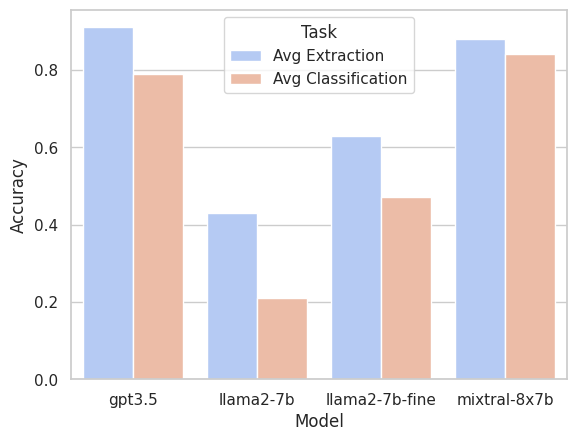

In [211]:
df_bar = df_display[["Model", "Avg Extraction", "Avg Classification"]]
df_bar_long = df_bar.melt(id_vars='Model', var_name="Task", value_name="Accuracy")
df_bar_long

sns.barplot(x='Model', y='Accuracy', hue='Task', data=df_bar_long,
            palette = "coolwarm", alpha=1, legend=True)

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

df_long = df.melt(id_vars='model', var_name="Task", value_name="Accuracy")
df_long

,model,Task,Accuracy
0,gpt3.5,document_type,0.76
1,llama2-7b,document_type,0.28
2,llama2-7b-fine,document_type,0.57
3,mixtral-8x7b,document_type,0.93
4,gpt3.5,name,0.92
5,llama2-7b,name,0.62
6,llama2-7b-fine,name,0.68
7,mixtral-8x7b,name,0.90
8,gpt3.5,schadensnummer,0.79
9,llama2-7b,schadensnummer,0.42


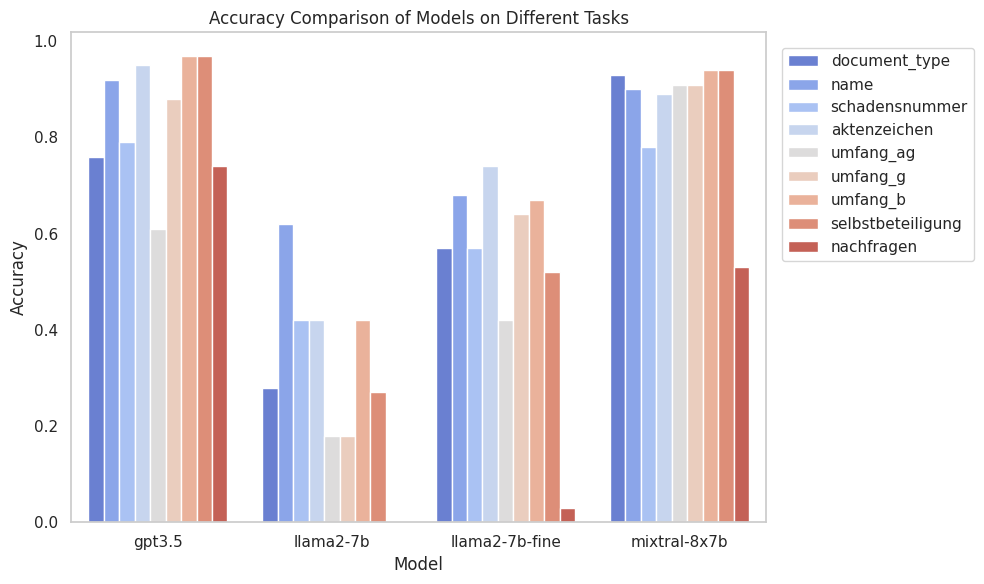

In [197]:
# Using Seaborn to create the bar plot
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

#pal = sns.color_palette("blend:#7AB,#EDA", as_cmap=False)
g = sns.barplot(x='model', y='Accuracy', hue='Task', data=df_long,
            palette = "coolwarm", alpha=1, legend=True)
#sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
#g.despine(left=True)

sns.move_legend(g, "upper right", title='Tasks')

plt.title('Accuracy Comparison of Models on Different Tasks')
plt.xlabel('Model')
plt.ylabel('Accuracy')
#plt.legend(title='Tasks', loc='upper right')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
